In [39]:
# La discrrtización es una técnica para reducir grandes volúmenes de datos
# en intervalos (bins) 

import numpy as np
import pandas as pd

resultados = np.random.randint(0,100, 1000)

bins = [0, 25,50, 75, 100]

# Crea un objeto del tipo "Categorical"
cortes = pd.cut(resultados, bins)

print(cortes)


[(50, 75], (25, 50], (0, 25], (50, 75], (75, 100], ..., (0, 25], (50, 75], (50, 75], (0, 25], (75, 100]]
Length: 1000
Categories (4, interval[int64]): [(0, 25] < (25, 50] < (50, 75] < (75, 100]]


In [40]:
# Categorías contenidas en el objeto Categorical
cortes.categories


IntervalIndex([(0, 25], (25, 50], (50, 75], (75, 100]],
              closed='right',
              dtype='interval[int64]')

In [41]:
# Ocurrencias
cortes.codes


array([ 2,  1,  0,  2,  3,  2,  0,  0,  2,  2,  0,  1,  3,  3,  0,  3,  0,
        2,  1,  1,  0,  2,  0,  0,  0,  3,  2,  0,  1,  1,  2,  3,  3,  3,
        0,  3,  3,  2,  0,  0,  1,  0,  2,  0,  0,  0,  1,  0,  3,  3,  3,
        2,  1,  3,  0,  3,  3,  3,  2,  3,  3,  2,  1,  0,  0,  1,  1,  1,
        3,  0,  0,  1,  1,  1,  0,  3,  2,  1,  2,  3,  3,  3,  2,  2,  0,
        2,  2,  1,  1,  0,  1,  1,  0,  2,  2,  3,  1,  3,  3, -1,  1,  2,
        3,  3,  0,  0,  1,  2,  3,  1,  0,  1,  3,  0,  3,  3,  2,  2,  0,
        2,  2,  1,  1,  2,  3,  3,  0,  3,  0,  1,  3,  1,  1,  0,  0,  3,
        3,  0,  1,  2,  1,  2,  1,  3,  1,  0,  3,  2,  2,  1,  3,  1,  2,
        1,  0,  1,  2,  3,  1,  3,  3,  1,  1,  0,  2,  2,  2,  1,  3,  0,
        2,  2,  2,  1,  2,  2,  0,  2,  0,  1,  3,  1,  2,  2,  3,  3,  2,
        0,  2,  0,  1,  0,  0,  0,  2,  0,  2,  2,  1,  3,  2,  2,  2,  2,
        0,  0,  2,  1,  2,  0,  1,  2,  2,  1,  3,  1,  0,  1,  2,  1,  3,
        2,  2,  2,  0,  2

In [42]:
# Mostrar la cuenta de objetos en cada ocurrencia pd.value_count()
pd.value_counts(cortes)

(50, 75]     256
(75, 100]    251
(25, 50]     245
(0, 25]      243
dtype: int64

In [43]:
# Asignando nombres a los bins, usando el parámetro labels

bin_nombres = ['más bajos', 'bajos', 'altos', 'más altos']

pd.cut(resultados, bins, labels=bin_nombres)

[altos, bajos, más bajos, altos, más altos, ..., más bajos, altos, altos, más bajos, más altos]
Length: 1000
Categories (4, object): [más bajos < bajos < altos < más altos]

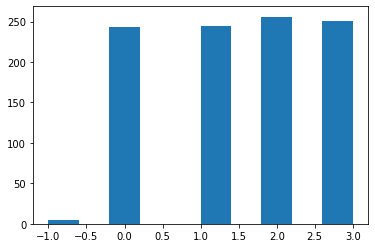

In [44]:
# Con los codes es posible graficar, por ejemplo, histogramas
res2 = pd.cut(resultados, bins, labels=bin_nombres).codes

import matplotlib.pyplot as plt

plt.hist(res2)
plt.show()

In [45]:
# Corte en quintiles pd.qcut(), donde cada uno tiene la misma cantidad de ocurrencias de casos

corteq = pd.qcut(resultados, 5)

corteq

[(41.0, 61.0], (21.0, 41.0], (-0.001, 21.0], (41.0, 61.0], (80.0, 99.0], ..., (-0.001, 21.0], (41.0, 61.0], (41.0, 61.0], (-0.001, 21.0], (61.0, 80.0]]
Length: 1000
Categories (5, interval[float64]): [(-0.001, 21.0] < (21.0, 41.0] < (41.0, 61.0] < (61.0, 80.0] < (80.0, 99.0]]

In [46]:
pd.value_counts(corteq)

(-0.001, 21.0]    204
(21.0, 41.0]      202
(61.0, 80.0]      200
(80.0, 99.0]      199
(41.0, 61.0]      195
dtype: int64

In [47]:
# Detección de valores fuera de rango (outliers)

datos = pd.DataFrame(np.random.rand(5000, 4))

datos.describe()

0            1            2            3
count  5000.000000  5000.000000  5000.000000  5000.000000
mean      0.501429     0.500838     0.506645     0.503498
std       0.290286     0.291164     0.288922     0.285666
min       0.000010     0.000241     0.000021     0.000644
25%       0.250849     0.244488     0.255670     0.251850
50%       0.508385     0.506070     0.506161     0.510829
75%       0.753196     0.755738     0.757792     0.748358
max       0.999957     0.999813     0.999853     0.999985

In [48]:
# Obteniendo la desviación estándar de cada columna

datos.std()

0    0.290286
1    0.291164
2    0.288922
3    0.285666
dtype: float64

In [63]:
# Filtramos como uotliers aquellos valores superiores a 3 veces la desviación estándar
# Empleamos la función any() para aplicar este filtro a cada columna particular

datos[(np.abs(datos) > (3*datos.std()))]

0         1         2         3
0          NaN       NaN       NaN  0.896781
1          NaN       NaN       NaN       NaN
2          NaN       NaN       NaN       NaN
3          NaN       NaN  0.889426       NaN
4          NaN       NaN       NaN       NaN
...        ...       ...       ...       ...
4995  0.954764       NaN       NaN       NaN
4996       NaN       NaN       NaN       NaN
4997       NaN       NaN       NaN       NaN
4998       NaN  0.983282       NaN       NaN
4999       NaN       NaN       NaN       NaN

[5000 rows x 4 columns]